<a href="https://colab.research.google.com/github/gabrieltorquato/portfolio/blob/main/Dashboard_CENIPA_Acidentes_Aeron%C3%A1uticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dashboard - CENIPA - Acidentes Aeronáuticos**
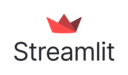

Com a crescente demanda por soluções de visualização de dados mais interativas e intuitivas, a biblioteca [Streamlit](https://docs.streamlit.io/) tem se tornado uma das principais ferramentas de desenvolvimento de aplicações web para cientistas de dados.

Lançada em 2019, a Streamlit é uma biblioteca de código aberto escrita em Python, que permite aos desenvolvedores criar aplicativos web interativos para visualização de dados de forma rápida e fácil. A principal vantagem da Streamlit é a sua simplicidade: com apenas algumas linhas de código, é possível criar uma aplicação web e visualizar os resultados em tempo real.

Em resumo, a biblioteca Streamlit é uma excelente ferramenta para criar aplicativos web interativos e intuitivos para visualização de dados. Com sua simplicidade, facilidade de uso e recursos poderosos, a Streamlit é uma ótima escolha para cientistas de dados e desenvolvedores que desejam criar visualizações de dados impressionantes de forma rápida e fácil.

E é com essa ferramente que hoje irei analisar e criar um dashboard com base nos dados de Acidentes Aeronáuticos da CENIPA.

# **A análise dos dados**
Para essa análise inicial, iremos importar os dados necessários e verificar as primeiras entradas da base de

In [1]:
# importar os pacotes necessários
import pandas as pd

DATA_URL = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv"

# importar o arquivo csv
data = pd.read_csv(DATA_URL, index_col='codigo_ocorrencia')

# ver as primeiras entradas
data.head()

,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
codigo_ocorrencia,,,,,,,,,,,,,,,,,,,,,
201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,...,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


Criar um dicionário apenas com as colunas que serão usadas e os nomes padronizados para cada uma dessas colunas.

In [2]:
columns = {
        'ocorrencia_latitude': 'latitude',
        'ocorrencia_longitude': 'longitude',
        'ocorrencia_dia': 'data',
        'ocorrencia_classificacao': 'classificacao',
        'ocorrencia_tipo': 'tipo',
        'ocorrencia_tipo_categoria': 'tipo_categoria',
        'ocorrencia_tipo_icao': 'tipo_icao',
        'ocorrencia_aerodromo': 'aerodromo',
        'ocorrencia_cidade': 'cidade',
        'investigacao_status': 'status',
        'divulgacao_relatorio_numero': 'relatorio_numero',
        'total_aeronaves_envolvidas': 'aeronaves_envolvidas'
    }

data = data.rename(columns=columns)
data.head()

,classificacao,tipo,tipo_categoria,tipo_icao,latitude,longitude,cidade,ocorrencia_uf,ocorrencia_pais,aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,status,relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
codigo_ocorrencia,,,,,,,,,,,,,,,,,,,,,
201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,SJOG,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,SSKW,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201311259977425,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-11.4956,-61.4508,CACOAL,RO,BRASIL,SSKW,...,12:32:00,NaN,FINALIZADA,IG-209/CENIPA/2013,SIM,2014-04-07,0,1,NÃO,2018-08-28
201103187273112,INCIDENTE,OUTROS,OUTROS,OTHR,-13.1950,-60.8184,CEREJEIRAS,RO,BRASIL,****,...,13:30:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


Converter o formato da coluna data para o formato datetime

In [3]:
data.data = data.data + " " + data.ocorrencia_horario
data.data = pd.to_datetime(data.data)

# ver conversão
data.data

codigo_ocorrencia
201305055424986   2013-05-05 11:00:00
201605160250139   2016-05-13 19:19:00
201805021421302   2018-03-09 22:40:00
201311259977425   2013-11-25 12:32:00
201103187273112   2011-03-18 13:30:00
                          ...        
200811264169752   2008-11-26 16:40:00
200910311058203   2009-10-31 12:10:00
200810318709738   2008-10-31 18:00:00
200803063018556   2008-03-06 07:55:00
201309012098180   2013-09-02 02:54:00
Name: data, Length: 5208, dtype: datetime64[ns]

Selecionar apenas as colunas que serão usadas no app do Streamlit (será o retorno da função load_data())

In [4]:
data[list(columns.values())]

,latitude,longitude,data,classificacao,tipo,tipo_categoria,tipo_icao,aerodromo,cidade,status,relatorio_numero,aeronaves_envolvidas
codigo_ocorrencia,,,,,,,,,,,,
201305055424986,-9.9085,-63.0333,2013-05-05 11:00:00,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,SJOG,ARIQUEMES,FINALIZADA,***,1
201605160250139,-11.2644,-61.2589,2016-05-13 19:19:00,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,SSKW,CACOAL,ATIVA,IG-084/CENIPA/2016,1
201805021421302,-11.4956,-61.4508,2018-03-09 22:40:00,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,SSKW,CACOAL,FINALIZADA,***,1
201311259977425,-11.4956,-61.4508,2013-11-25 12:32:00,INCIDENTE GRAVE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,SSKW,CACOAL,FINALIZADA,IG-209/CENIPA/2013,1
201103187273112,-13.1950,-60.8184,2011-03-18 13:30:00,INCIDENTE,OUTROS,OUTROS,OTHR,****,CEREJEIRAS,FINALIZADA,***,1
...,...,...,...,...,...,...,...,...,...,...,...,...
200811264169752,0.0000,0.0000,2008-11-26 16:40:00,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,****,NÃO IDENTIFICADA,FINALIZADA,***,1
200910311058203,0.0000,0.0000,2009-10-31 12:10:00,INCIDENTE,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,****,NÃO IDENTIFICADA,FINALIZADA,***,1
200810318709738,0.0000,0.0000,2008-10-31 18:00:00,INCIDENTE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,****,NÃO IDENTIFICADA,FINALIZADA,***,1


In [5]:
data.classificacao.unique().tolist()

['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE']

In [6]:
data[(data.data.dt.year == 2017) & (data.classificacao.isin(['ACIDENTE']))]

,classificacao,tipo,tipo_categoria,tipo_icao,latitude,longitude,cidade,ocorrencia_uf,ocorrencia_pais,aerodromo,...,ocorrencia_horario,investigacao_aeronave_liberada,status,relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
codigo_ocorrencia,,,,,,,,,,,,,,,,,,,,,
201711152026161,ACIDENTE,POUSO SEM TREM,CONTATO ANORMAL COM A PISTA,ARC,-10.8706,-61.8467,JI-PARANÁ,RO,BRASIL,SBJI,...,20:40:00,SIM,ATIVA,A-141/CENIPA/2017,NÃO,NaN,0,1,NÃO,2018-08-28
201706241353561,ACIDENTE,CAUSADO POR FENÔMENO METEOROLÓGICO EM VOO,OUTROS,OTHR,3.2483,-60.2467,BONFIM,RR,BRASIL,SSJL,...,21:00:00,SIM,FINALIZADA,A-087/CENIPA/2017,SIM,2018-05-10,0,1,NÃO,2018-08-28
201710191757029,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,3.3503,-59.8780,BONFIM,RR,BRASIL,****,...,11:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
201707050515445,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,2.7917,-60.5900,CANTÁ,RR,BRASIL,SWPD,...,15:00:00,NÃO,ATIVA,A-089/CENIPA/2017,NÃO,NaN,0,1,NÃO,2018-08-28
201706152048494,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,2.1111,-62.4453,CARACARAÍ,RR,BRASIL,SJLU,...,18:00:00,SIM,ATIVA,A-085/CENIPA/2017,NÃO,NaN,0,1,NÃO,2018-08-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201704031537231,ACIDENTE,INDETERMINADO,INDETERMINADO,UNK,-23.4611,-47.4900,SOROCABA,SP,BRASIL,****,...,17:45:00,NÃO,ATIVA,A-054/CENIPA/2017,NÃO,NaN,0,1,NÃO,2018-08-28
201711271331205,ACIDENTE,EXCURSÃO DE PISTA,EXCURSÃO DE PISTA,RE,-21.2572,-49.7942,UBARANA,SP,BRASIL,SDTO,...,11:30:00,SIM,ATIVA,A-151/CENIPA/2017,NÃO,NaN,0,1,SIM,2018-08-28
201707061920096,ACIDENTE,POUSO LONGO,EXCURSÃO DE PISTA,RE,-23.4414,-45.0761,UBATUBA,SP,BRASIL,SDUB,...,20:20:00,SIM,ATIVA,A-090/CENIPA/2017,NÃO,NaN,0,1,SIM,2018-08-28


# **E agora, a criação do Dashboard**
Caso você tenha interesse em replicar o código, segue o link: [Link do código](https://bit.ly/3FIRGPM)

Caso tenha interesse em acessar o dashboard, segue o link: [Link do Dashboard](https://cenipa.streamlit.app/)

In [ ]:
# importar bibliotecas
import streamlit as st
import pandas as pd
import pydeck as pdk


DATA_URL = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv"
st.set_page_config(page_title="Dashboard - CENIPA", page_icon="✈️", layout="centered", initial_sidebar_state="auto", menu_items=None)

@st.cache
def load_data():
    """
    Carrega os dados de ocorrências aeronáuticas do CENIPA.
    :return: DataFrame com colunas selecionadas.
    """
    columns = {
        'ocorrencia_latitude': 'latitude',
        'ocorrencia_longitude': 'longitude',
        'ocorrencia_dia': 'data',
        'ocorrencia_classificacao': 'classificacao',
        'ocorrencia_tipo': 'tipo',
        'ocorrencia_tipo_categoria': 'tipo_categoria',
        'ocorrencia_tipo_icao': 'tipo_icao',
        'ocorrencia_aerodromo': 'aerodromo',
        'ocorrencia_cidade': 'cidade',
        'ocorrencia_uf': 'estado',
        'investigacao_status': 'status',
        'divulgacao_relatorio_numero': 'relatorio_numero',
        'total_aeronaves_envolvidas': 'aeronaves_envolvidas'
    }

    data = pd.read_csv(DATA_URL, index_col='codigo_ocorrencia')
    data = data.rename(columns=columns)
    data.data = data.data + " " + data.ocorrencia_horario
    data.data = pd.to_datetime(data.data)
    data = data[list(columns.values())]

    return data


# carregar os dados
df = load_data()
labels = df.classificacao.unique().tolist() #busca de todos tipos de classificação no df
labels2 = df.estado.unique().tolist() #busca de todos estados presentes no df

# SIDEBAR
# Parâmetros e número de ocorrências
st.sidebar.header("Parâmetros")
info_sidebar = st.sidebar.empty()    # placeholder, para informações filtradas que só serão carregadas depois

# Slider de seleção do ano
st.sidebar.subheader("Ano")
year_to_filter = st.sidebar.slider('Escolha o ano desejado', 2008, 2018, 2017)

# Checkbox da Tabela
st.sidebar.subheader("Tabela")
tabela = st.sidebar.empty()    # placeholder que só vai ser carregado com o df_filtered

# Multiselect com os labels únicos dos tipos de classificação
label_to_filter = st.sidebar.multiselect(
    label="Escolha a classificação da ocorrência",
    options=labels,
    default=["INCIDENTE", 'ACIDENTE']
)

# Multiselect com os lables únicos dos estados
estados_filtro = st.sidebar.multiselect(
    label="Escolha o estado da ocorrência",
    options=labels2,
    default=['RO', 'AC','AM','RR','PA','AP','TO','MA','PI','CE',
             'RN','PB','PE','AL','SE','BA','MG','ES','RJ','SP',
             'PR','SC','RS','MS','MT','GO','DF',]
)


# Informação no rodapé da Sidebar
st.sidebar.markdown("""
A base de dados de ocorrências aeronáuticas é gerenciada pelo ***Centro de Investigação e Prevenção de Acidentes 
Aeronáuticos (CENIPA)***.
""")
st.sidebar.markdown("""
Meus contatos:\n
[Portfolio](https://github.com/gabrieltorquato/portfolio)\n
[Linkedin](https://www.linkedin.com/in/gabrieltorquato/)
""")

# Somente aqui os dados filtrados por ano são atualizados em novo dataframe
filtered_df = df[(df.data.dt.year == year_to_filter) & (df.classificacao.isin(label_to_filter)) & (df.estado.isin(estados_filtro))]

# Aqui o placehoder vazio finalmente é atualizado com dados do filtered_df
info_sidebar.info("{} ocorrências selecionadas.".format(filtered_df.shape[0]))


# MAIN
st.title("CENIPA - Acidentes Aeronáuticos")
st.markdown(f"""
            ℹ️ Estão sendo exibidas as ocorrências classificadas como **{", ".join(label_to_filter)}**
            para o ano de **{year_to_filter}**.
            """)

# raw data (tabela) dependente do checkbox
if tabela.checkbox("Mostrar tabela de dados"):
    st.write(filtered_df)


# mapa
st.subheader("Mapa de ocorrências")
st.map(filtered_df)